In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from functions import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

1,032,673 events


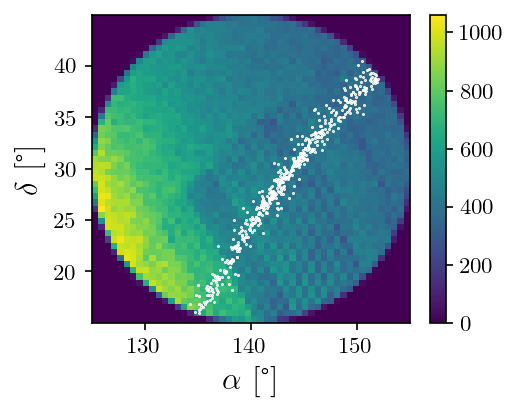

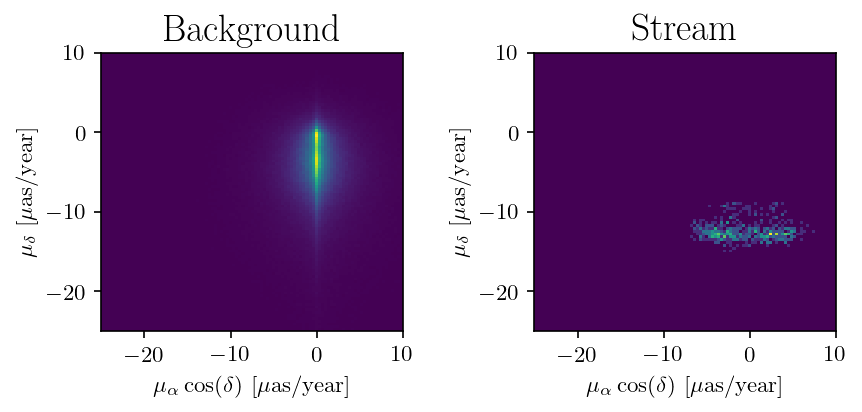

In [5]:
stream = "gd1"
df = load_file(stream = stream)
print("{:,} events".format(len(df)))
visualize_stream(df, type="hist", show_stream=True)

# Scan through different slices

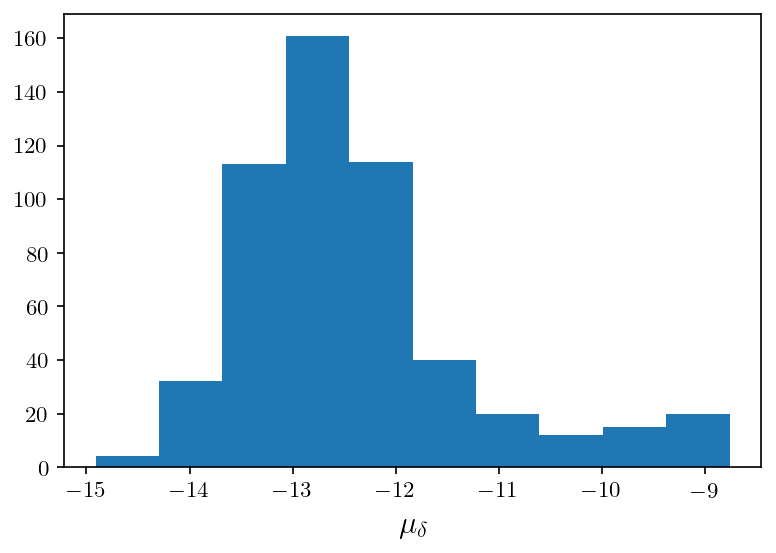

In [30]:
# plt.hist(df.μ_δ, bins=100,)
plt.hist(df[df.stream].μ_δ)
plt.xlabel(r"$\mu_\delta$");

Slice 0
Scanning between μ_δ = [-133.5, -125.5]
Skipping -- not enough events
Slice 1
Scanning between μ_δ = [-125.5, -117.5]
Skipping -- not enough events
Slice 2
Scanning between μ_δ = [-117.5, -109.5]
Skipping -- not enough events
Slice 3
Scanning between μ_δ = [-109.5, -101.5]
Skipping -- not enough events
Slice 4
Scanning between μ_δ = [-101.5, -93.5]
Skipping -- not enough events
Slice 5
Scanning between μ_δ = [-93.5, -85.5]
Skipping -- not enough events
Slice 6
Scanning between μ_δ = [-85.5, -77.5]
Skipping -- not enough events
Slice 7
Scanning between μ_δ = [-77.5, -69.5]
Skipping -- not enough events
Slice 8
Scanning between μ_δ = [-69.5, -61.5]
Skipping -- not enough events
Slice 9
Scanning between μ_δ = [-61.5, -53.5]
Skipping -- not enough events
Slice 10
Scanning between μ_δ = [-53.5, -45.5]
Skipping -- not enough events
Slice 11
Scanning between μ_δ = [-45.5, -37.5]
Skipping -- not enough events
Slice 12
Scanning between μ_δ = [-37.5, -29.5]
Skipping -- not enough events


/home/mpettee/GaiaCWoLa/functions.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice = df[(df.μ_δ > sb_min) & (df.μ_δ < sb_max)]


Total counts: SR = 13,013, SB = 4,941
Signal region has 0 stream and 13,013 bkg events.
Sideband region has 0 stream and 4,941 bkg events.
Slice 14
Scanning between μ_δ = [-21.5, -13.5]
Slice has 64,647 events.
Slice has 58 stream stars.
-21.504897792384885 -20.504897792384885 -14.505260215313125 -13.505260215313125
Total counts: SR = 46,324, SB = 18,321
Signal region has 2 stream and 46,322 bkg events.
Sideband region has 56 stream and 18,265 bkg events.
Slice 15
Scanning between μ_δ = [-13.5, -5.5]
Slice has 328,203 events.
Slice has 473 stream stars.
-13.505078730918246 -12.505078730918246 -6.505264691044334 -5.505264691044334
Total counts: SR = 232,712, SB = 95,489
Signal region has 229 stream and 232,483 bkg events.
Sideband region has 244 stream and 95,245 bkg events.
Slice 16
Scanning between μ_δ = [-5.5, 2.5]
Slice has 576,264 events.
Slice has 0 stream stars.
-5.505217568534655 -4.505217568534655 1.4947316155988721 2.494731615598872
Total counts: SR = 466,680, SB = 109,582
Sig

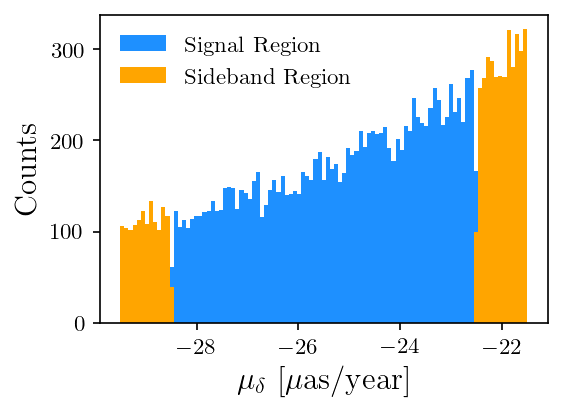

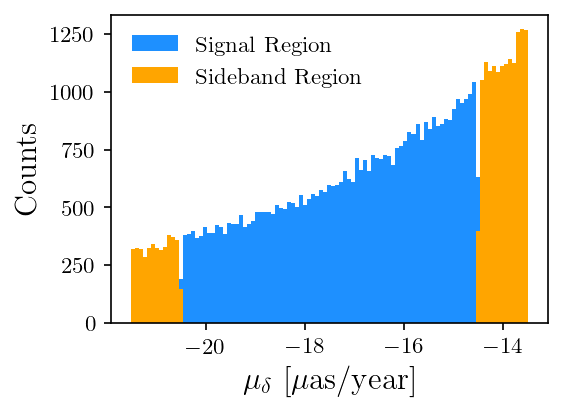

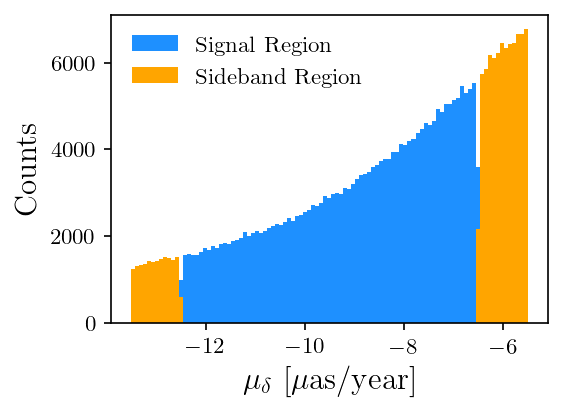

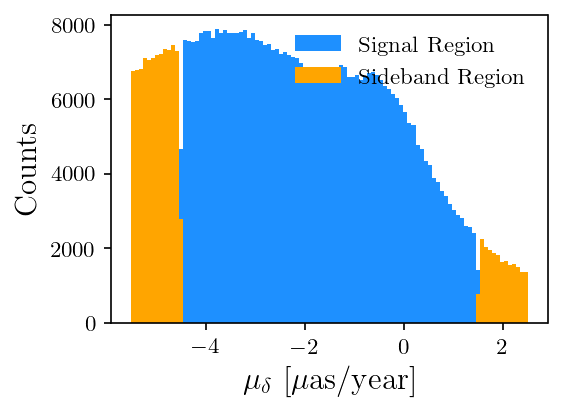

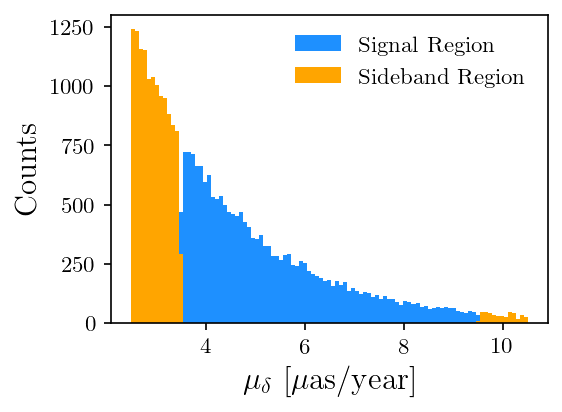

In [28]:
window_size = 8
a = np.arange(df.μ_δ.min(),df.μ_δ.max(),window_size) 
for i in range(len(a)-1):
    print("==================\nSlice {}".format(i))
    min = a[i]
    max = a[i+1]
    print("Scanning between μ_δ = [{:.1f}, {:.1f}]".format(min, max))
    df_cut = df[(min < df.μ_δ) & (df.μ_δ < max)]
    n_events = len(df_cut)
    if n_events > 10000:
        print("Slice has {:,} events.".format(n_events))
        print("Slice has {:,} stream stars.".format(df_cut.stream.sum()))
        df_slice = signal_sideband(
            df_cut, 
            stream = "")
    else: 
        print("Skipping -- not enough events")

Slice 0
Scanning between μ_δ = [-133.5, -128.5]
Skipping -- not enough events
Slice 1
Scanning between μ_δ = [-128.5, -123.5]
Skipping -- not enough events
Slice 2
Scanning between μ_δ = [-123.5, -118.5]
Skipping -- not enough events
Slice 3
Scanning between μ_δ = [-118.5, -113.5]
Skipping -- not enough events
Slice 4
Scanning between μ_δ = [-113.5, -108.5]
Skipping -- not enough events
Slice 5
Scanning between μ_δ = [-108.5, -103.5]
Skipping -- not enough events
Slice 6
Scanning between μ_δ = [-103.5, -98.5]
Skipping -- not enough events
Slice 7
Scanning between μ_δ = [-98.5, -93.5]
Skipping -- not enough events
Slice 8
Scanning between μ_δ = [-93.5, -88.5]
Skipping -- not enough events
Slice 9
Scanning between μ_δ = [-88.5, -83.5]
Skipping -- not enough events
Slice 10
Scanning between μ_δ = [-83.5, -78.5]
Skipping -- not enough events
Slice 11
Scanning between μ_δ = [-78.5, -73.5]
Skipping -- not enough events
Slice 12
Scanning between μ_δ = [-73.5, -68.5]
Skipping -- not enough eve

/home/mpettee/GaiaCWoLa/functions.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice = df[(df.μ_δ > sb_min) & (df.μ_δ < sb_max)]


Total counts: SR = 12,519, SB = 8,696
Signal region has 0 stream and 12,519 bkg events.
Sideband region has 0 stream and 8,696 bkg events.
Training on 14,850 events.
33,921 trainable parameters.

Epoch 00001: val_loss improved from inf to 0.67925, saving model to slice_22/weights.h5

Epoch 00002: val_loss improved from 0.67925 to 0.67892, saving model to slice_22/weights.h5

Epoch 00003: val_loss improved from 0.67892 to 0.67861, saving model to slice_22/weights.h5

Epoch 00004: val_loss did not improve from 0.67861

Epoch 00005: val_loss improved from 0.67861 to 0.67752, saving model to slice_22/weights.h5

Epoch 00006: val_loss did not improve from 0.67752

Epoch 00007: val_loss did not improve from 0.67752

Epoch 00008: val_loss did not improve from 0.67752

Epoch 00009: val_loss improved from 0.67752 to 0.67738, saving model to slice_22/weights.h5

Epoch 00010: val_loss did not improve from 0.67738

Epoch 00011: val_loss did not improve from 0.67738

Epoch 00012: val_loss did not i

/home/mpettee/GaiaCWoLa/functions.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice = df[(df.μ_δ > sb_min) & (df.μ_δ < sb_max)]


Total counts: SR = 29,195, SB = 20,800
Signal region has 2 stream and 29,193 bkg events.
Sideband region has 56 stream and 20,744 bkg events.
Training on 34,996 events.
33,921 trainable parameters.

Epoch 00001: val_loss improved from inf to 0.68012, saving model to slice_23/weights.h5

Epoch 00002: val_loss improved from 0.68012 to 0.67748, saving model to slice_23/weights.h5

Epoch 00003: val_loss improved from 0.67748 to 0.67683, saving model to slice_23/weights.h5

Epoch 00004: val_loss improved from 0.67683 to 0.67665, saving model to slice_23/weights.h5

Epoch 00005: val_loss improved from 0.67665 to 0.67624, saving model to slice_23/weights.h5

Epoch 00006: val_loss improved from 0.67624 to 0.67605, saving model to slice_23/weights.h5

Epoch 00007: val_loss did not improve from 0.67605

Epoch 00008: val_loss did not improve from 0.67605

Epoch 00009: val_loss did not improve from 0.67605

Epoch 00010: val_loss did not improve from 0.67605

Epoch 00011: val_loss improved from 0.6

/home/mpettee/GaiaCWoLa/functions.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice = df[(df.μ_δ > sb_min) & (df.μ_δ < sb_max)]


Total counts: SR = 78,123, SB = 57,572
Signal region has 208 stream and 77,915 bkg events.
Sideband region has 265 stream and 57,307 bkg events.
Training on 94,986 events.
33,921 trainable parameters.

Epoch 00001: val_loss improved from inf to 0.68169, saving model to slice_24/weights.h5

Epoch 00002: val_loss improved from 0.68169 to 0.68111, saving model to slice_24/weights.h5

Epoch 00003: val_loss did not improve from 0.68111

Epoch 00004: val_loss improved from 0.68111 to 0.68099, saving model to slice_24/weights.h5

Epoch 00005: val_loss did not improve from 0.68099

Epoch 00006: val_loss did not improve from 0.68099

Epoch 00007: val_loss improved from 0.68099 to 0.68082, saving model to slice_24/weights.h5

Epoch 00008: val_loss improved from 0.68082 to 0.68065, saving model to slice_24/weights.h5

Epoch 00009: val_loss did not improve from 0.68065

Epoch 00010: val_loss improved from 0.68065 to 0.68059, saving model to slice_24/weights.h5

Epoch 00011: val_loss improved from 

/home/mpettee/GaiaCWoLa/functions.py:243: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  cut = cuts[np.nanargmax(purities)]


Top 0.001% stars: Purity = 0.0% 
Top 0.01% stars: Purity = 0.0% 
Top 0.1% stars: Purity = 0.0% 
Top 1% stars: Purity = 0.0% 
Top 5% stars: Purity = 0.2% 
Top 10% stars: Purity = 0.1% 
Top 20% stars: Purity = 0.1% 
Slice 25
Scanning between μ_δ = [-8.5, -3.5]
Slice has 376,110 events.
Slice has 0 stream stars.
-8.505223098336439 -7.5052230983364385 -4.505264705193161 -3.5052647051931616


/home/mpettee/GaiaCWoLa/functions.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice = df[(df.μ_δ > sb_min) & (df.μ_δ < sb_max)]


Total counts: SR = 229,872, SB = 146,236
Signal region has 0 stream and 229,872 bkg events.
Sideband region has 0 stream and 146,236 bkg events.
Training on 263,275 events.
33,921 trainable parameters.

Epoch 00001: val_loss improved from inf to 0.66820, saving model to slice_25/weights.h5

Epoch 00002: val_loss improved from 0.66820 to 0.66776, saving model to slice_25/weights.h5

Epoch 00003: val_loss improved from 0.66776 to 0.66776, saving model to slice_25/weights.h5

Epoch 00004: val_loss improved from 0.66776 to 0.66751, saving model to slice_25/weights.h5

Epoch 00005: val_loss improved from 0.66751 to 0.66731, saving model to slice_25/weights.h5

Epoch 00006: val_loss did not improve from 0.66731

Epoch 00007: val_loss improved from 0.66731 to 0.66728, saving model to slice_25/weights.h5

Epoch 00008: val_loss improved from 0.66728 to 0.66683, saving model to slice_25/weights.h5

Epoch 00009: val_loss did not improve from 0.66683

Epoch 00010: val_loss improved from 0.66683 to

KeyboardInterrupt: 

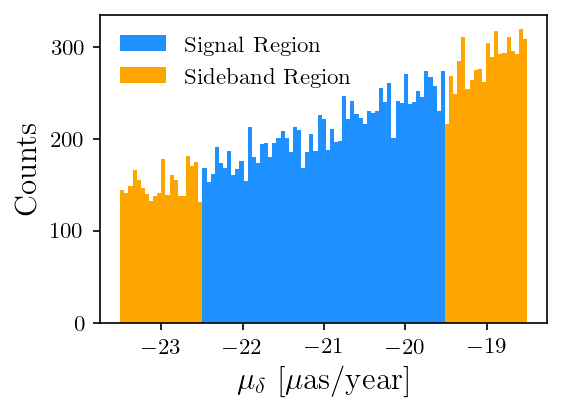

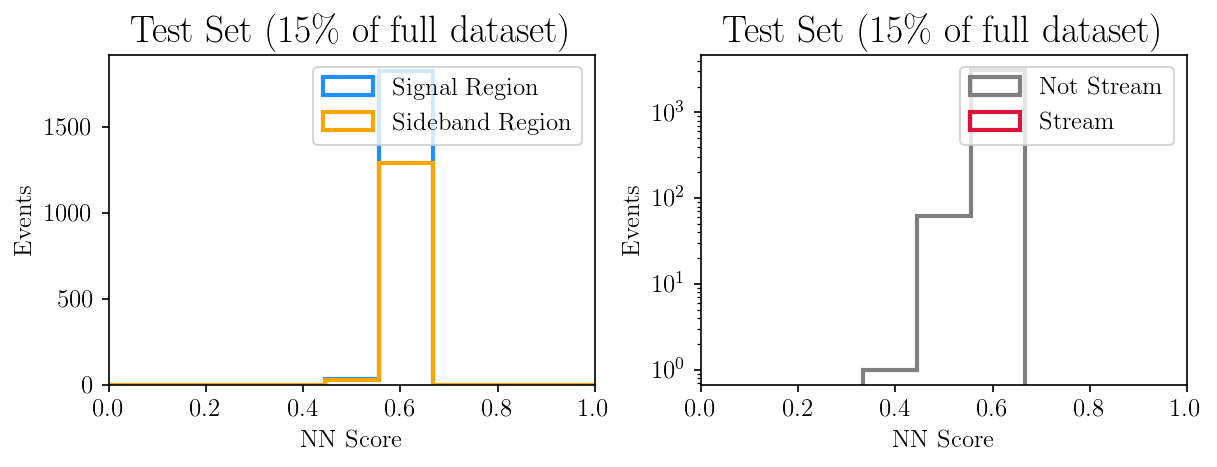

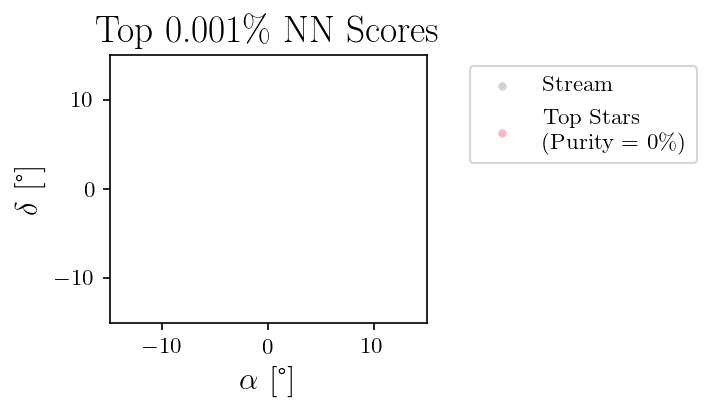

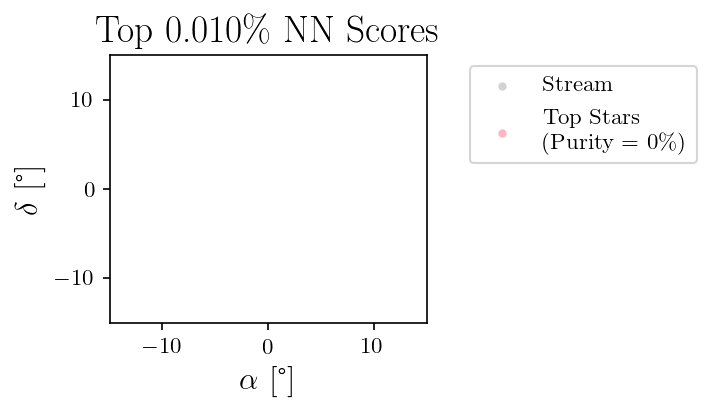

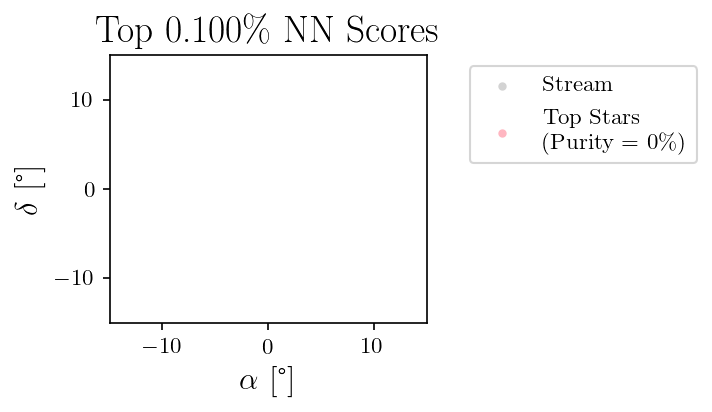

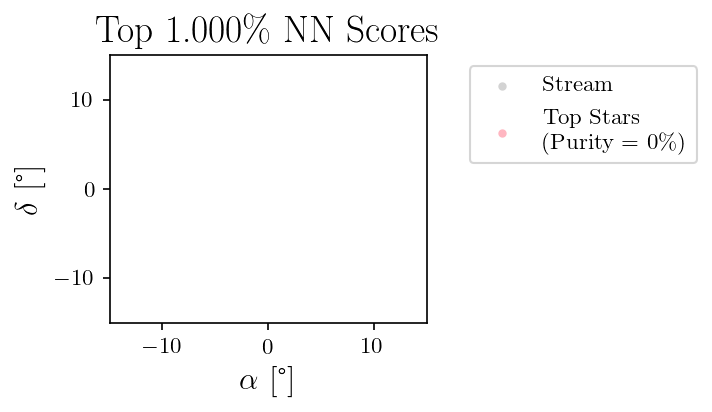

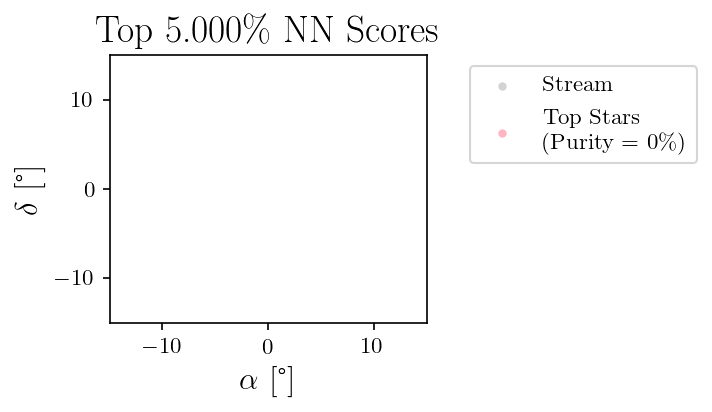

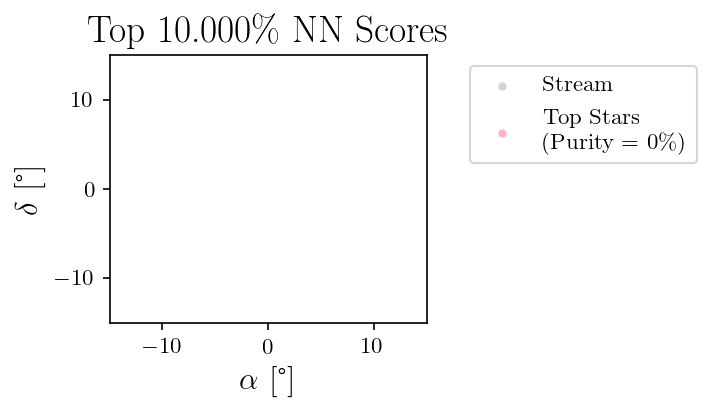

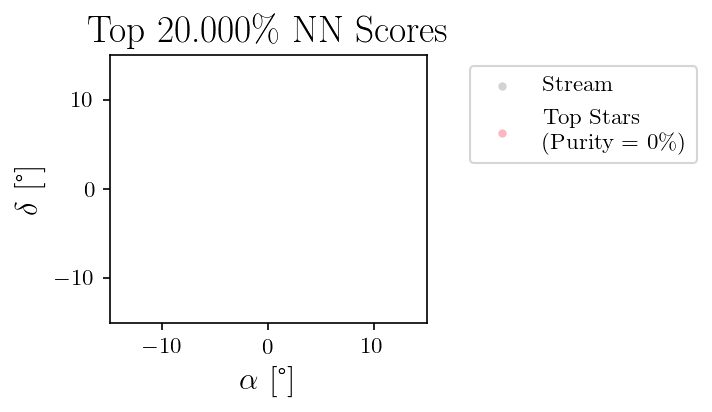

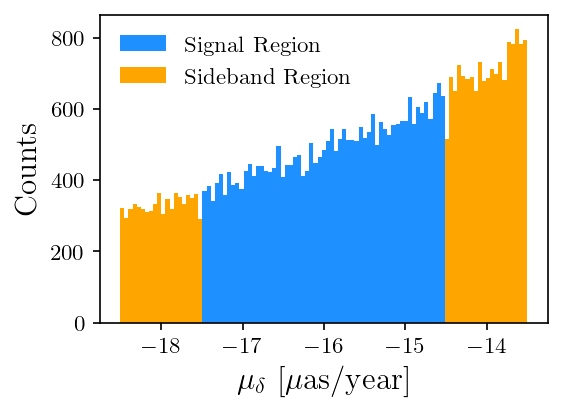

Error in callback <function flush_figures at 0x7f78a89f6d30> (for post_execute):


KeyboardInterrupt: 

In [26]:
window_size = 5
a = np.arange(df.μ_δ.min(),df.μ_δ.max(),window_size) 
for i in range(len(a)-1):
    print("==================\nSlice {}".format(i))
    min = a[i]
    max = a[i+1]
    print("Scanning between μ_δ = [{:.1f}, {:.1f}]".format(min, max))
    df_cut = df[(min < df.μ_δ) & (df.μ_δ < max)]
    n_events = len(df_cut)
    if n_events > 10000:
        print("Slice has {:,} events.".format(n_events))
        print("Slice has {:,} stream stars.".format(df_cut.stream.sum()))
        df_slice = signal_sideband(
            df_cut, 
            stream = "")
        ### Prepare datasets for training
        training_vars = ['μ_α','δ','α','g','b-r']
        train, validate, test = np.split(df_slice.sample(frac=1), [int(.7*len(df_slice)), int(.85*len(df_slice))]) # 70/15/15 train/validate/test split

        x_train, x_val, x_test = [train[training_vars], validate[training_vars], test[training_vars]]
        y_train, y_val, y_test = [train.label, validate.label, test.label]

        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)
        x_val = sc.transform(x_val)
        print("Training on {:,} events.".format(len(train)))

        ### Define model architecture 
        layer_size = 128 #len(train)/(200*(len(training_vars)+1))
        #layer_size = int(np.ceil(len(train)/200))
        dropout = 0.1
        reg = regularizers.l2(1e-4)
        model = Sequential()
        model.add(Dense(layer_size, input_dim=len(training_vars), activation='relu',
                       activity_regularizer=reg
                       )) 
        if dropout != 0: 
            model.add(Dropout(dropout))
        model.add(Dense(layer_size, activation='relu',
                       activity_regularizer=reg
                       ))
        if dropout != 0: 
            model.add(Dropout(dropout))
        model.add(Dense(layer_size, activation='relu',
                       activity_regularizer=reg
                       ))
        if dropout != 0: 
            model.add(Dropout(dropout))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        print("{:,} trainable parameters.".format(model.count_params()))
        #     model.summary()

        # stops if val_loss doesn't improve for [patience] straight epochs
        early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                                 patience=20, 
                                                 verbose=0) 

        # saves weights from the epoch with lowest val_loss 
        os.makedirs("slice_{}".format(i), exist_ok = True)
        checkpoint = callbacks.ModelCheckpoint("slice_{}/weights.h5".format(i), 
                                               monitor='val_loss', 
                                               mode='auto', 
                                               verbose=2, 
                                               save_best_only=True, 
                                               save_weights_only=True)

        ### Train!
        history = model.fit(x_train, y_train, 
                        epochs=100, 
                        batch_size=64,
                        validation_data=(x_val,y_val),
                        callbacks = [
    #                         PlotLossesKeras(),
                                     checkpoint,early_stopping],
                        verbose = 0,
                       )
        ### Load best weights
        model.load_weights("slice_{}/weights.h5".format(i))

        ### Add the NN prediction score to the test set: 
        test["nn_score"] = model.predict(x_test)
        fake_eff_baseline, real_eff_baseline, thresholds = roc_curve(np.asarray(y_test), test.nn_score)
        auc_baseline = auc(fake_eff_baseline, real_eff_baseline)
        print("AUC: {:.3f}".format(auc_baseline))

        ### Plot scores:
        plot_results(test, save_folder="slice_{}".format(i))
    else: 
        print("Skipping -- not enough events")